In [13]:
%matplotlib widget
import cv2 as cv
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

# 设置中文字体为 wqy
plt.rcParams["font.sans-serif"] = ["WenQuanYi Zen Hei"]  # 使用文泉驿正黑字体
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

In [14]:
def segment_image(src, threshold, kernel_size):
    """
    对图像进行分割，并返回分割后的边界框和掩码。

    参数:
    src (numpy.ndarray): 输入的源图像。
    threshold (int): 用于二值化的阈值。
    kernel_size (tuple): 用于形态学操作的内核大小。

    返回:
    tuple: 包含两个元素的元组：
        - (x, y, w, h) (tuple): 分割后的边界框，包含左上角坐标 (x, y) 和宽度、高度 (w, h)。
        - mask (numpy.ndarray or None): 分割后的掩码图像，如果没有找到轮廓则为 None。

    异常:
    无
    """
    _, src_bin = cv.threshold(src, threshold, 255, cv.THRESH_BINARY)
    kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    src_bin = cv.morphologyEx(src_bin, cv.MORPH_OPEN, kernel)
    src_bin = cv.morphologyEx(src_bin, cv.MORPH_CLOSE, kernel)
    coords = cv.findNonZero(src_bin)
    contours, _ = cv.findContours(src_bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if not contours:
        return cv.boundingRect(coords), None
    contour = max(contours, key=cv.contourArea)
    mask = np.zeros(src.shape, dtype=np.uint8)
    cv.drawContours(mask, [contour], -1, 1, thickness=cv.FILLED)
    return cv.boundingRect(coords), mask

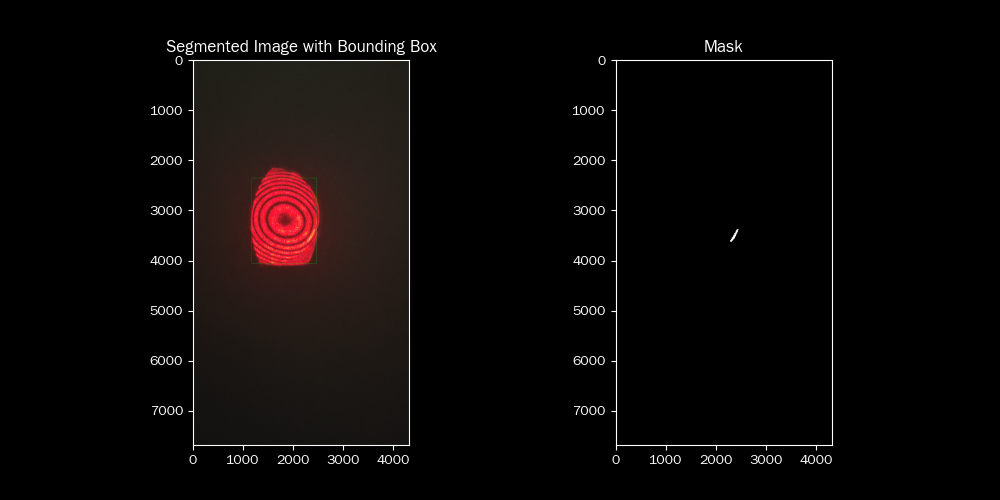

In [16]:
# 加载图像
image_path = "images/frame_1250.png"  # 替换为你的图像路径
image = cv.imread(image_path)

# 转换为灰度图像
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# 设置阈值和内核大小
threshold = 128  # 根据需要调整阈值
kernel_size = (5, 5)  # 根据需要调整内核大小

# 调用 segment_image 函数
bbox, mask = segment_image(gray_image, threshold, kernel_size)

# 绘制边界框
x, y, w, h = bbox
cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 显示结果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Segmented Image with Bounding Box")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")

plt.show()